<a href="https://colab.research.google.com/github/yakupusame/LOL/blob/master/Leauge_of_Legends(All_classifiers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('df.csv')

In [3]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [4]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [6]:
df.drop(['blueWardsDestroyed','blueEliteMonsters',
              'blueExperienceDiff','blueGoldDiff','blueTotalJungleMinionsKilled','redWardsDestroyed',
              'redEliteMonsters',
              'redExperienceDiff','redGoldDiff','redTotalJungleMinionsKilled',
         'blueTowersDestroyed','redTowersDestroyed','blueFirstBlood','redFirstBlood','gameId','blueHeralds','redHeralds',
         'blueGoldPerMin','redGoldPerMin'],axis = 1,inplace = True)

In [7]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueDragons', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueCSPerMin', 'redWardsPlaced', 'redKills',
       'redDeaths', 'redAssists', 'redDragons', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled', 'redCSPerMin'],
      dtype='object')

In [8]:
df.head()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueCSPerMin,redWardsPlaced,redKills,redDeaths,redAssists,redDragons,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redCSPerMin
0,0,28,9,6,11,0,17210,6.6,17039,195,19.5,15,6,9,8,0,16567,6.8,17047,197,19.7
1,0,12,5,5,5,0,14712,6.6,16265,174,17.4,12,5,5,2,1,17620,6.8,17438,240,24.0
2,0,15,7,11,4,1,16113,6.4,16221,186,18.6,15,11,7,14,0,17285,6.8,17254,203,20.3
3,0,43,4,5,5,0,15157,7.0,17954,201,20.1,15,5,4,10,0,16478,7.0,17961,235,23.5
4,0,75,6,6,6,0,16400,7.0,18543,210,21.0,17,6,6,7,1,17404,7.0,18313,225,22.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96bb20c080>,
      dtype=object)

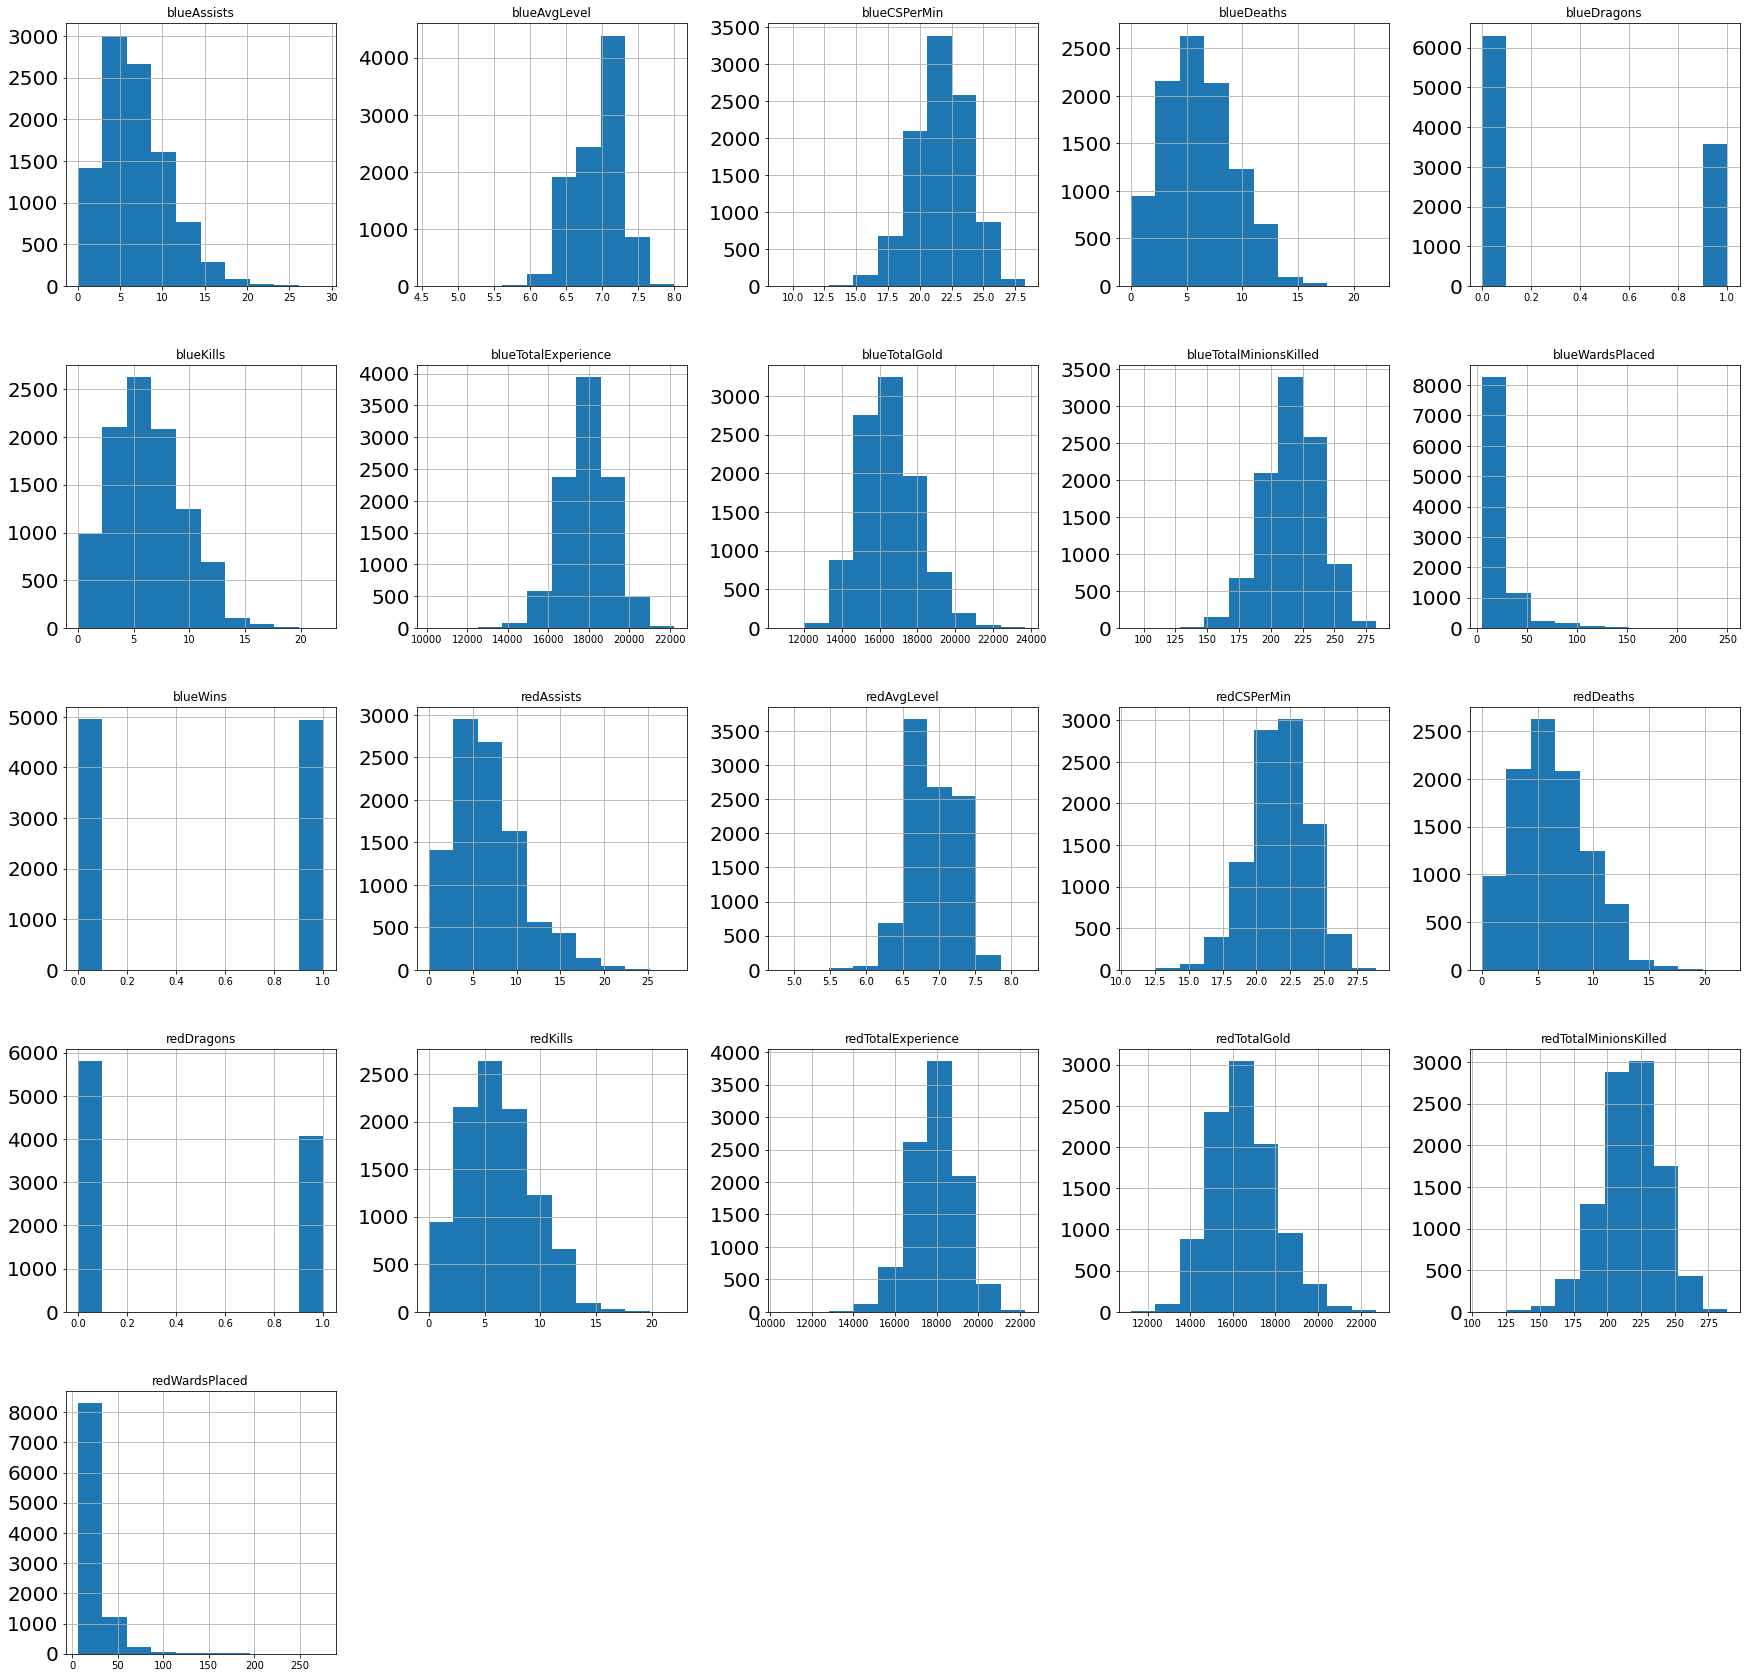

In [9]:
df.hist(figsize=(30,30),ylabelsize=20,xlabelsize=10)

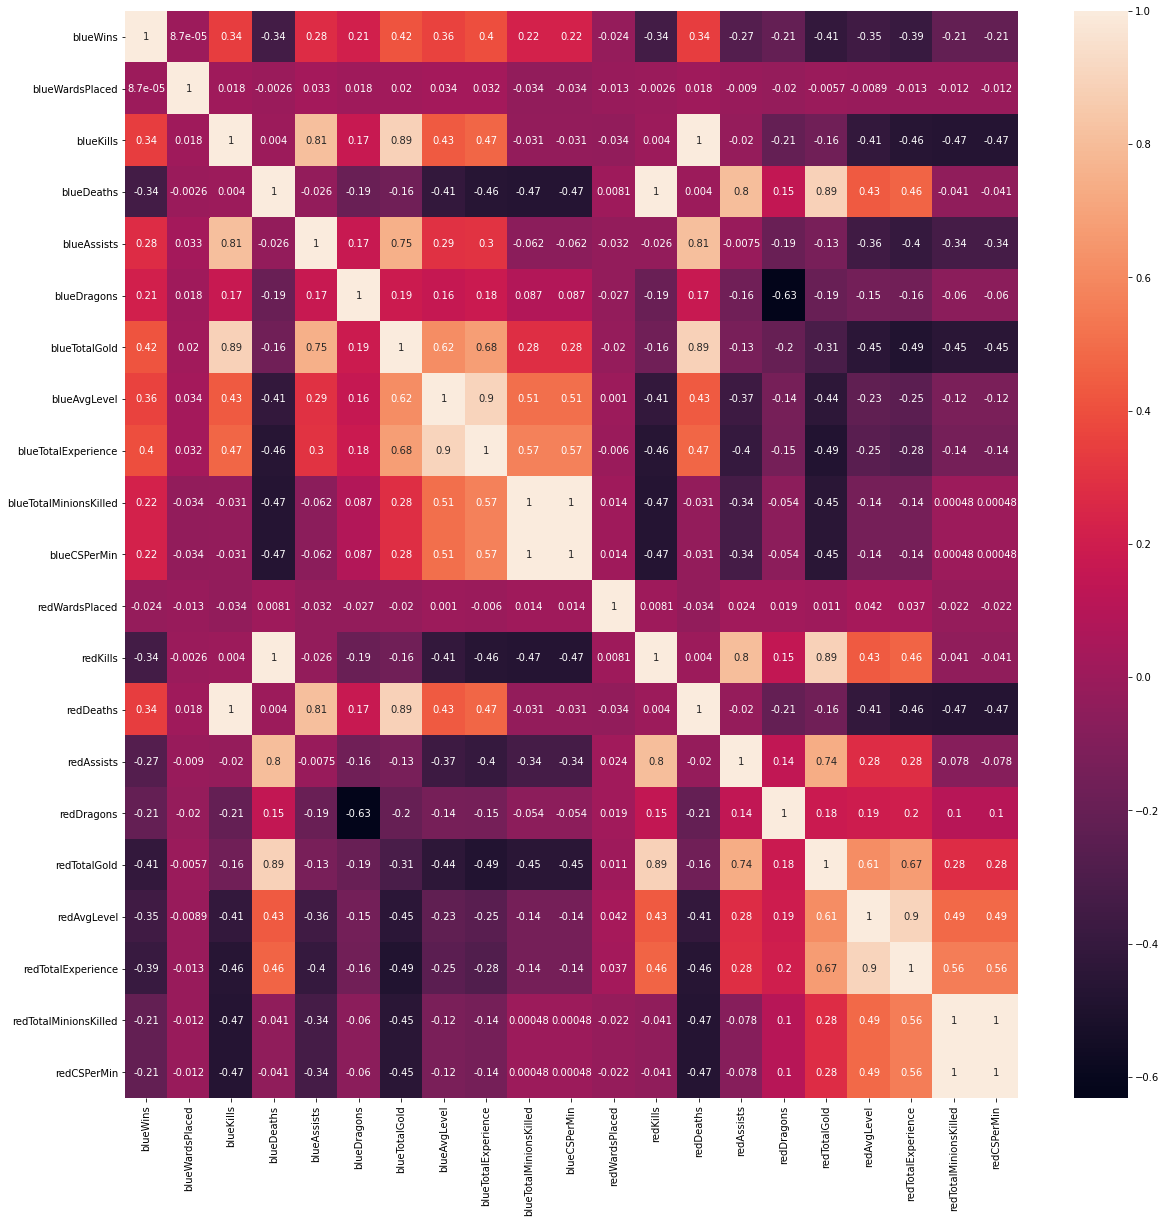

In [10]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

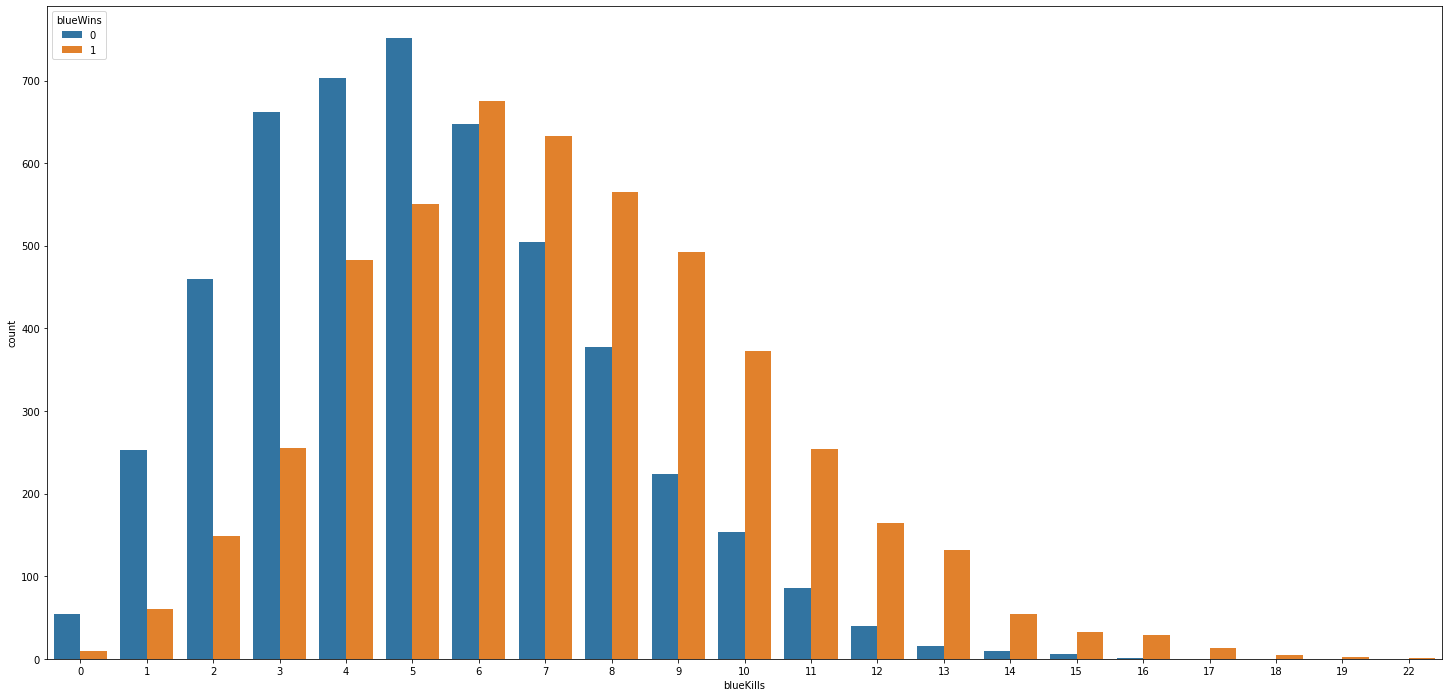

In [11]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'blueKills', hue = 'blueWins', data = df)

In [12]:
df.shape

(9879, 21)

In [13]:
y = df['blueWins']
df.drop(['blueWins'],axis=1,inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df,y,test_size = 0.25)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',)
tree_classifier.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
y_pred_tree = tree_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_tree)
print(cm)
accuracy_score(y_test,y_pred_tree)

[[777 451]
 [466 776]]


0.6287449392712551

In [18]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1228
           1       0.63      0.62      0.63      1242

    accuracy                           0.63      2470
   macro avg       0.63      0.63      0.63      2470
weighted avg       0.63      0.63      0.63      2470



In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 500 , criterion = 'entropy')
forest_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred_forest  = forest_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_forest)
print(cm)
accuracy_score(y_test , y_pred_forest)

[[898 330]
 [351 891]]


0.7242914979757085

In [21]:
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1228
           1       0.73      0.72      0.72      1242

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



In [22]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred_logistic = logistic_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_logistic)
print(cm)
accuracy_score(y_test,y_pred_logistic)

[[893 335]
 [330 912]]


0.7307692307692307

In [24]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1228
           1       0.73      0.73      0.73      1242

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p=2 )
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_pred_knn = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)
accuracy_score(y_test,y_pred_knn)

[[865 363]
 [395 847]]


0.6931174089068826

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred_svm = svm_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_svm)
print(cm)
accuracy_score(y_test,y_pred_svm)

[[892 336]
 [353 889]]


0.7210526315789474

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred_nb = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred_nb)
print(cm)
accuracy_score(y_test,y_pred_nb)

[[898 330]
 [338 904]]


0.7295546558704453

In [31]:
svm2_classifier = SVC(kernel='linear')
svm2_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_pred_svm2 = svm2_classifier.predict(x_test)
accuracy_score(y_test,y_pred_svm2)

0.7291497975708502